In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# synthetic data
from sklearn.datasets import make_classification
X,Y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_informative=2,n_redundant=0,n_clusters_per_class=1)

In [3]:
X

array([[ 0.19441942,  1.18785498],
       [-0.13341382, -0.05222663],
       [-0.08892054, -0.21103279],
       ...,
       [-1.62752857,  1.20646946],
       [-1.50051835,  1.49711625],
       [-0.68008994,  0.31486912]], shape=(1000, 2))

In [4]:
df=pd.DataFrame(X,columns=['feature 1','feature 2'])
df['Output']=Y
df.head()

,feature 1,feature 2,Output
0,0.194419,1.187855,1
1,-0.133414,-0.052227,0
2,-0.088921,-0.211033,0
3,-1.251064,0.848195,1
4,-0.551984,1.090282,1


<Axes: xlabel='feature 1', ylabel='feature 2'>

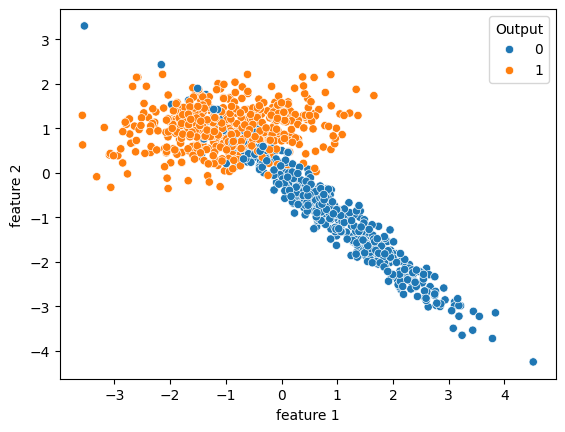

In [5]:
sns.scatterplot(df,x=df['feature 1'],y=df['feature 2'],hue=df['Output'])

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.25)

In [7]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')

In [8]:
svc.fit(x_train,y_train)
y_hat=svc.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_test,y_hat)
cm=confusion_matrix(y_test,y_hat)
report=classification_report(y_test,y_hat)

Accuracty :0.924
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       114
           1       0.89      0.99      0.93       136

    accuracy                           0.92       250
   macro avg       0.93      0.92      0.92       250
weighted avg       0.93      0.92      0.92       250



<Axes: >

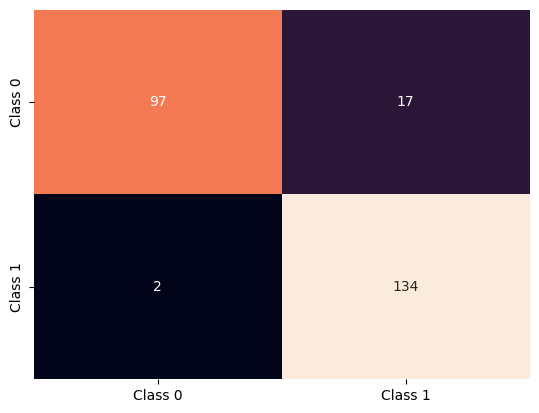

In [10]:
print(f"Accuracty :{score}\nClassification Report:\n{report}")
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['Class 0', 'Class 1'],yticklabels=['Class 0', 'Class 1'],cbar=False)

### for non linear relationships

In [11]:
# synthetic data
from sklearn.datasets import make_classification
X,Y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_informative=2,n_redundant=0,n_clusters_per_class=2)

In [12]:
df=pd.DataFrame(X,columns=['feature 1','feature 2'])
df['Output']=Y
df.head()

,feature 1,feature 2,Output
0,-1.667199,1.046026,0
1,0.704161,0.955471,1
2,-1.537815,-1.157941,0
3,0.733396,1.893170,1
4,-1.148882,1.084546,0


<Axes: xlabel='feature 1', ylabel='feature 2'>

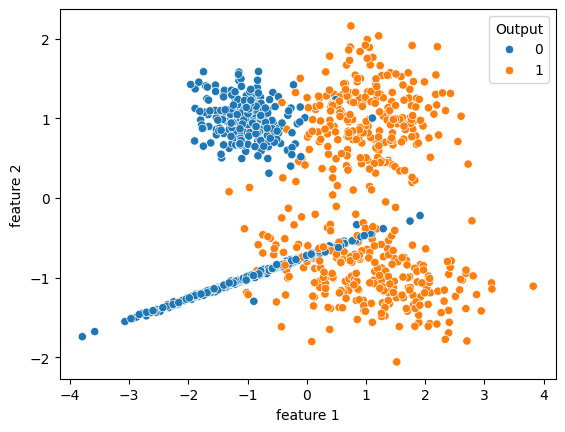

In [13]:
sns.scatterplot(df,x=df['feature 1'],y=df['feature 2'],hue=df['Output'])

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42,test_size=0.25)

In [15]:
from sklearn.svm import SVC
rbf=SVC(kernel='rbf')

In [16]:
rbf.fit(x_train,y_train)
y_hat=rbf.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_test,y_hat)
cm=confusion_matrix(y_test,y_hat)
report=classification_report(y_test,y_hat)

Accuracty :0.916
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       120
           1       0.93      0.91      0.92       130

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



<Axes: >

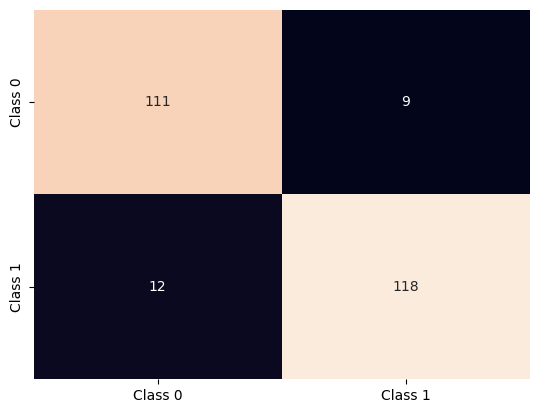

In [18]:
print(f"Accuracty :{score}\nClassification Report:\n{report}")
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['Class 0', 'Class 1'],yticklabels=['Class 0', 'Class 1'],cbar=False)

#### ploynomial kernel

In [19]:
from sklearn.svm import SVC
poly=SVC(kernel='poly')

In [20]:
poly.fit(x_train,y_train)
y_hat=poly.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_test,y_hat)
cm=confusion_matrix(y_test,y_hat)
report=classification_report(y_test,y_hat)

Accuracty :0.9
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       120
           1       0.88      0.93      0.91       130

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



<Axes: >

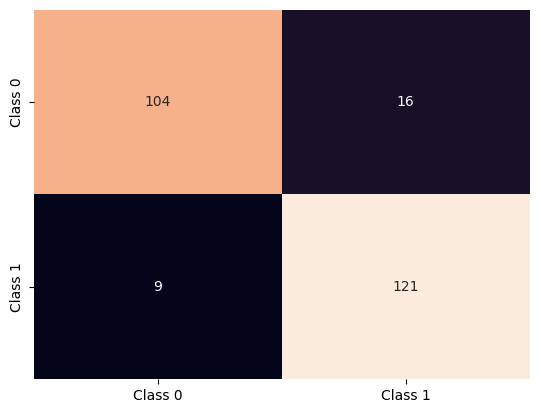

In [22]:
print(f"Accuracty :{score}\nClassification Report:\n{report}")
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['Class 0', 'Class 1'],yticklabels=['Class 0', 'Class 1'],cbar=False)

### Hyperparameter Tuninig for SVC

In [23]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'C':[0.1,1.10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}
classifier=SVC()

In [24]:
gridCV=GridSearchCV(classifier,param_grid=param_grid,cv=5,verbose=3,refit=True)


In [25]:
gridCV.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.907 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.913 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,estimator,SVC()
,param_grid,"{'C': [0.1, 1.1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1000


In [26]:
gridCV.best_params_

{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}

In [27]:
gridCV.best_score_

np.float64(0.9413333333333334)

In [ ]:
y_hat=gridCV.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
score=accuracy_score(y_test,y_hat)
cm=confusion_matrix(y_test,y_hat)
report=classification_report(y_test,y_hat)

Accuracty :0.968
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       120
           1       0.99      0.95      0.97       130

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



<Axes: >

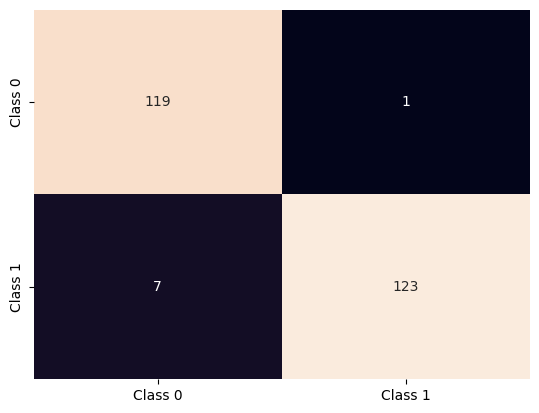

In [30]:
print(f"Accuracty :{score}\nClassification Report:\n{report}")
sns.heatmap(cm, annot=True, fmt='d',xticklabels=['Class 0', 'Class 1'],yticklabels=['Class 0', 'Class 1'],cbar=False)